<a href="https://colab.research.google.com/github/jaimeandresalas/prediction_NBA/blob/main/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importar Librerias necesarias para el proyecto
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

In [4]:
# Load the nba dataset
data = pd.read_csv("nba.csv")

# Display the first five records
display(data.head(n=5))

,Unnamed: 0,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,NaN,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,NaN,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,NaN,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,NaN,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,4,Matt Geiger,48,11.5,NaN,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [5]:
data.isnull().any() #Vemos que casi la mayoria de datos tiene datos nulos, por lo cual sera mejor realizar una limpieza de estos datos

Unnamed: 0     False
Name           False
GP             False
MIN            False
PTS             True
FGM             True
FGA             True
FG%             True
3P Made         True
3PA             True
3P%             True
FTM             True
FTA             True
FT%             True
OREB            True
DREB            True
REB             True
AST             True
STL             True
BLK             True
TOV             True
TARGET_5Yrs    False
dtype: bool

In [6]:
#Necesitare contar cuantos valores hay falsos para saber que hare.
#data.isnull().any()
missing_values_count = data.isnull().sum()
# look at the number of missing points in the first ten columns
missing_values_count

Unnamed: 0      0
Name            0
GP              0
MIN             0
PTS            36
FGM            33
FGA            39
FG%            45
3P Made        45
3PA            34
3P%            58
FTM            35
FTA            31
FT%            46
OREB           45
DREB           33
REB            44
AST            39
STL            43
BLK            33
TOV            41
TARGET_5Yrs     0
dtype: int64

In [7]:
# Some more additional data analysis
display(np.round(data.describe()))

,Unnamed: 0,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.0,1340.0,1340.0,1304.0,1307.0,1301.0,1295.0,1295.0,1306.0,1282.0,1305.0,1309.0,1294.0,1295.0,1307.0,1296.0,1301.0,1297.0,1307.0,1299.0,1340.0
mean,670.0,60.0,18.0,7.0,3.0,6.0,44.0,0.0,1.0,19.0,1.0,2.0,70.0,1.0,2.0,3.0,2.0,1.0,0.0,1.0,1.0
std,387.0,17.0,8.0,4.0,2.0,4.0,6.0,0.0,1.0,16.0,1.0,1.0,11.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0
min,0.0,11.0,3.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,335.0,47.0,11.0,4.0,1.0,3.0,40.0,0.0,0.0,0.0,1.0,1.0,65.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0
50%,670.0,63.0,16.0,6.0,2.0,5.0,44.0,0.0,0.0,23.0,1.0,2.0,71.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0
75%,1004.0,77.0,23.0,9.0,3.0,8.0,48.0,0.0,1.0,33.0,2.0,2.0,78.0,1.0,3.0,4.0,2.0,1.0,0.0,2.0,1.0
max,1339.0,82.0,41.0,28.0,10.0,20.0,74.0,2.0,6.0,100.0,8.0,10.0,100.0,5.0,10.0,14.0,9.0,2.0,4.0,4.0,1.0


In [8]:
#Para reemplazar los NAN que tiene mi modelo usare el mean
data = data.fillna(data.mean())

#Deseo explorar la relación entre las variables, me interesa conocer cual seria una relacion directa con TARGET_5Yrs, la cual me dice si jugo mas de 5 años en nba. Es decir sera mi variable a predecir en mi modelo

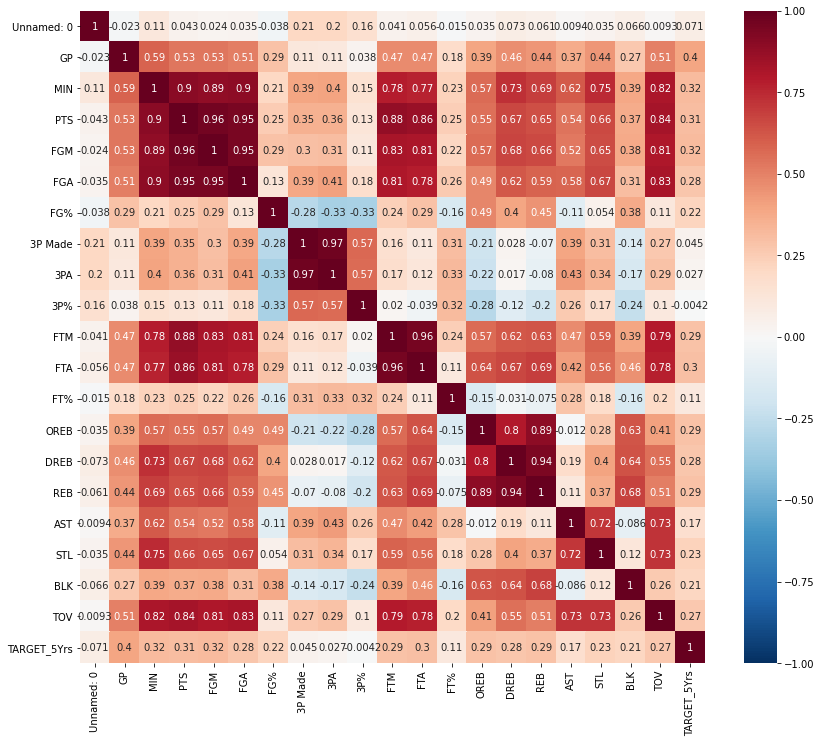

In [9]:
correlation = data.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
import seaborn as sns
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

La matriz de correlaccion me dio una mirada de datos muy significativos como GP, MIN PTS FGM FGA FG% FTm FTA OREB DREB REB STL TOV. Mi primer analisis sera con esos datos para realizar mi modelo usando solo esos datos para usar menos datos y permitirme lograr crear un modelo mas sencillo

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: ignored

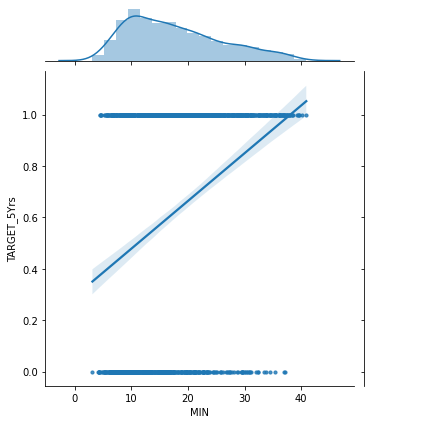

In [11]:
GP_correlation = data[['MIN', 'TARGET_5Yrs']]

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="MIN", y="TARGET_5Yrs", data=GP_correlation, height=6)

#Draws a regression plot in the grid 
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot)

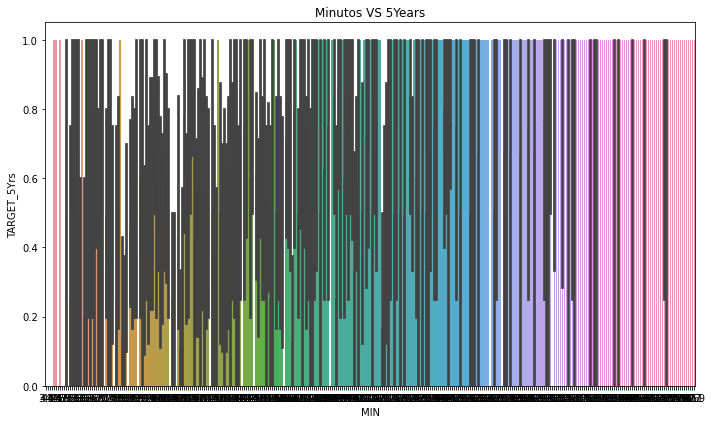

<Figure size 432x288 with 0 Axes>

In [12]:
#Observo que los datos no me dan mucha interpretacion en la forma de grafica. Cambiando la forma de la grafica para obtener mejores datos
fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x="MIN", y="TARGET_5Yrs", data=GP_correlation, ax=axs)
plt.title('Minutos VS 5Years')

plt.tight_layout()
plt.show()
plt.gcf().clear()

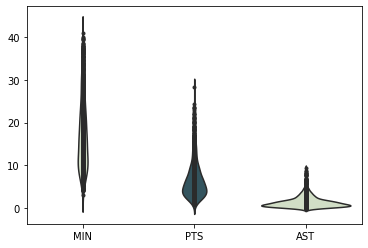

In [13]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data[["MIN", 'PTS','AST']], palette=pal, inner="points")
plt.show()

#Modelado De Forma Supervisada

In [14]:
#Variables usadas primero usare las primeras 6 variables luego las otras 6 variables y por ultimo un modelo con todas las variables. 
variables_usadas=["GP", "MIN", "PTS", "FGM", "FGA", "FG%", "FTM", "FTA", "OREB", "DREB", "REB", "STL", "TOV"] 
# Se analizara el peso de estas variables luego para seleccionar un mejor modelo a utilizar que sera el modelo final buscando tener un accuracy mayor a .75

In [15]:
#Displays the first 2 columns
display(data.head(n=5))


# Split the data into features and target label
quality_raw = data['TARGET_5Yrs']
features_raw = data[variables_usadas]

,Unnamed: 0,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,0,Brandon Ingram,36,27.4,7.400000,2.6,7.6,34.700000,0.500000,2.100000,25.0,1.6,2.3,70.352628,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,1,Andrew Harrison,35,26.9,7.200000,2.0,6.7,29.600000,0.700000,0.787825,23.5,2.6,3.4,76.500000,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,2,JaKarr Sampson,74,15.3,5.200000,2.0,4.7,42.200000,0.250888,1.700000,24.4,0.9,1.3,67.000000,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,3,Malik Sealy,58,11.6,5.700000,2.3,5.5,44.159537,0.100000,0.500000,22.6,0.9,1.3,68.900000,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,4,Matt Geiger,48,11.5,6.831442,1.6,3.0,52.400000,0.000000,0.100000,0.0,1.3,1.9,67.400000,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, test_size=0.25, random_state=92)

classif = RandomForestClassifier(n_estimators=500, random_state=286, max_features=4)
classif.fit(X_train,y_train)

y_pred = classif.predict(X_test)
print((len(y_test)-sum(abs(y_test-y_pred)))/len(y_test))

0.6865671641791045


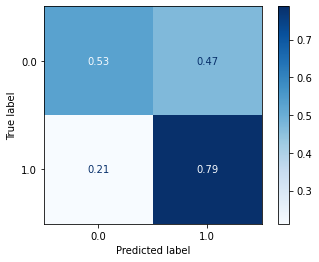

In [26]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(classif, X_test, y_test,cmap=plt.cm.Blues,normalize = 'true')

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = y_pred
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.53      0.57       132
         1.0       0.72      0.79      0.75       203

    accuracy                           0.69       335
   macro avg       0.67      0.66      0.66       335
weighted avg       0.68      0.69      0.68       335



###Regresion Logistica ahora vamos a intentar solucionarlo con una Regresion

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1e5, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.7074626865671642

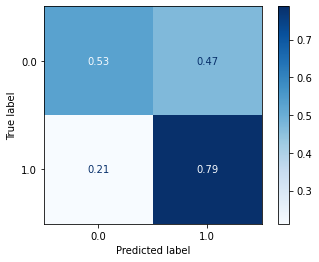

In [31]:
disp = plot_confusion_matrix(classif, X_test, y_test,cmap=plt.cm.Blues,normalize = 'true')

In [32]:
predictions = log_reg.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.67      0.51      0.58       132
         1.0       0.72      0.84      0.78       203

    accuracy                           0.71       335
   macro avg       0.70      0.67      0.68       335
weighted avg       0.70      0.71      0.70       335



###Regresion Logistica con CV

A continuación se usa Regresión logística con cross validation para intentar obtener un desempeño mejor que los anteriores ya que tenía mejor "score" (Accuracy). Acá es importante mencionar que también es importante mencionar que se tomó la decisión en función de la matriz de confusión donde priorizó que efectivamente pueda clasificar con la menor cantidad de errores posibles. Por lo anteiror también se miró el recall y la regresión logística es la que estaba con buen accuracy y niveles medios de recall.

In [33]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=100, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

lr_l1.score(X_test, y_test)

0.7134328358208956

Se mejora el modelo usando esta forma de Regresion